In [1]:
import sys
from netCDF4 import Dataset
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *
from numpy import *
from pylab import *
import cmocean as cm
%matplotlib inline

In [2]:
outfile='/g/data/v45/jm5970/trackeddy_out/'

In [3]:
# Import SSH 10 yrs mean values to python environment.
ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/meanssh_10yrs_AEXP.nc')
ssh_mean=squeeze(ncfile.variables['SSH_mean'][:]/100)
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['Longitude'][:]
lat=ncfile.variables['Latitude'][:]

ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/mean_ssha_u_7yrs.nc')
u_mean=squeeze(ncfile.variables['U_mean'][:])

ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/mean_ssha_v_7yrs.nc')
v_mean=squeeze(ncfile.variables['V_mean'][:])

File: 307
1.1276
91
91


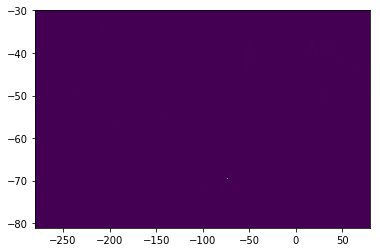

File: 308
1.1461
92
92


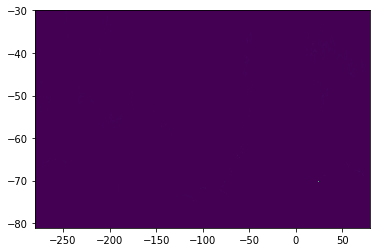

File: 309
1.11586
92
92


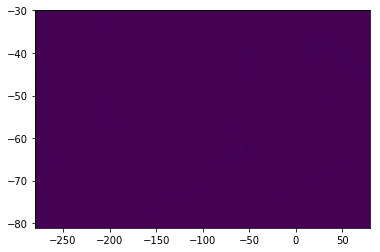

File: 310
1.11492
90
90


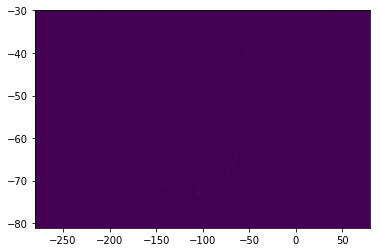

File: 311
1.08901
91
91


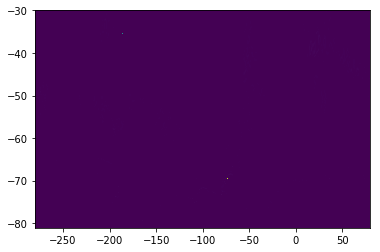

File: 312
1.09934


KeyboardInterrupt: 

In [4]:
timecounter=0
#eke =zeros(shape(eddyu))
#bjke =zeros(shape(eddyu))


uname='U'
vname='V'
units='m/s'
nc_description='Velocity of SSHa at the Southern Ocean of January over 7 years'
dim='2D'

for ii in range(307,328):
    print('File: '+str(ii))
    # Output data path
    outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output'+str(ii)+'/'
    # Import SSH values to python environment.
    ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
    eta=ncfile.variables['eta_t'][:]
    print(eta.max())
    mask=ma.getmask(eta[0,:,:])
    eta=eta-ssh_mean
    u_g=zeros(shape(eta))
    v_g=zeros(shape(eta))
    
    for tt in range(0,shape(eta)[0]):
        u_g[tt,:,:],v_g[tt,:,:]=geovelfield(eta[tt,:,:],lon,lat,mask)
        
    u_g=u_g-u_mean
    v_g=v_g-v_mean
    
    ufilename='/home/156/jm5970/notebooks/traceddy/data.input/ssha_'+str(ii)+'_u_1yrs.nc'
    vargeonc(ufilename,lat,lon,u_g,shape(u_g)[0],uname,nc_description=nc_description,units=units,dt='',dim=dim)
    vfilename='/home/156/jm5970/notebooks/traceddy/data.input/ssha_'+str(ii)+'_v_1yrs.nc'
    vargeonc(vfilename,lat,lon,v_g,shape(u_g)[0],vname,nc_description=nc_description,units=units,dt='',dim=dim)
    pcolormesh(lon,lat,sqrt(u_g[10,:,:]**2+v_g[10,:,:]**2))
    show()

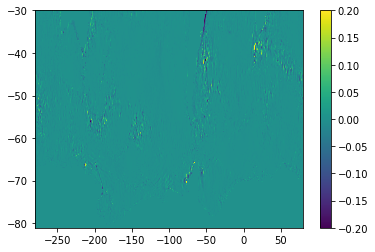

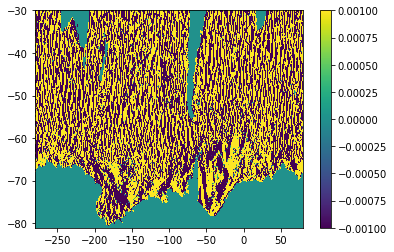

In [ ]:
pcolormesh(lon,lat,v_g[0,:,:]-v_g[1,:,:],vmin=-0.2,vmax=0.2)
colorbar()
show()
pcolormesh(lon,lat,v_g[0,:,:],vmin=-0.001,vmax=0.001)
colorbar()

In [4]:
uname='U'
vname='V'
units='m/s'
nc_description='Velocity of SSHa at the Southern Ocean of January over 1 years'
dim='2D'
ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/meanssh_10yrs_AEXP.nc')
ssh_mean=squeeze(ncfile.variables['SSH_mean'][:])

for ii in range(325,328):
    print(ii)
    outfile='/g/data/v45/jm5970/trackeddy_out/'
    eddy_tracking = np.load(outfile+str(ii)+'_pos.npy')
    eddy_tracking_struct=eddy_tracking.item()
    eddy_tracking = np.load(outfile+str(ii)+'_neg.npy')
    eddy_tracking_struct_neg=eddy_tracking.item()
    
    # Output data path
    outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output'+str(ii)+'/'
    # Import SSH values to python environment.
    ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
    ssha=(ncfile.variables['eta_t'][:]*100)-ssh_mean
    lon=ncfile.variables['xt_ocean_sub01'][:]
    lat=ncfile.variables['yt_ocean_sub01'][:]

    u_prime_eddy=zeros(shape(ssha))
    u_prime_eddy_n=zeros(shape(ssha))
    v_prime_eddy=zeros(shape(ssha))
    v_prime_eddy_n=zeros(shape(ssha))
    
    for tt in range(0,shape(ssha)[0]):
        ufilename=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/ssha_'+str(ii)+'_u_1yrs.nc')

        u_prime=np.squeeze(ufilename.variables['U'][tt,:,:])
        vfilename=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/ssha_'+str(ii)+'_v_1yrs.nc')
        v_prime=np.squeeze(vfilename.variables['V'][tt,:,:])
    
        u_prime_eddy[tt,:,:]=exeddy(eddy_tracking_struct,lat,lon,u_prime,0,1,inside=ssha[tt,:,:],diagnostics=False)
        u_prime_eddy_n[tt,:,:]=exeddy(eddy_tracking_struct_neg,lat,lon,u_prime,0,1,inside=ssha[tt,:,:],diagnostics=False)
        v_prime_eddy[tt,:,:]=exeddy(eddy_tracking_struct,lat,lon,v_prime,0,1,inside=ssha[tt,:,:],diagnostics=False)
        v_prime_eddy_n[tt,:,:]=exeddy(eddy_tracking_struct_neg,lat,lon,v_prime,0,1,inside=ssha[tt,:,:],diagnostics=False)
        
    u_prime=u_prime_eddy+u_prime_eddy_n
    v_prime=v_prime_eddy+v_prime_eddy_n
    
    ufilename='/home/156/jm5970/notebooks/traceddy/data.input/'+str(ii)+'_u_prime_eddy_1yrs.nc'
    vargeonc(ufilename,lat,lon,u_prime,shape(u_prime)[0],uname,nc_description=nc_description,units=units,dt='',dim=dim)
    vfilename='/home/156/jm5970/notebooks/traceddy/data.input/'+str(ii)+'_v_prime_eddy_1yrs.nc'
    vargeonc(vfilename,lat,lon,v_prime,shape(v_prime)[0],vname,nc_description=nc_description,units=units,dt='',dim=dim)
    

325
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of e

*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddie

*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddie

*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddie

*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddie

*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddie

*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddie

*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddie

*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddie

*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddie

# Satellite Data

In [3]:
from calendar import monthrange
year=1993
monthsin=[1,4,7,10]
monthsend=[4,7,10,13]
inputfiles='/g/data/ua8/CMEMS_SeaLevel/v3-0/'+str(year)+'/'

ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/mean_ssha_u_satellite_1yrs.nc')
u_mean=squeeze(ncfile.variables['U_mean'][:])



ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/mean_ssha_v_satellite_1yrs.nc')
v_mean=squeeze(ncfile.variables['V_mean'][:])
lon=ncfile.variables['Longitude'][:]
lat=ncfile.variables['Latitude'][:]

for ii in range(len(monthsin)):
    print('Analizing the year ',year,'in the months[',monthsin,'-',monthsend,']')
    
    dayssum=0
    for month in range(monthsin[ii],monthsend[ii]):
        dayssum=dayssum+monthrange(int(year), month)[1] 
    
    u_g=zeros([dayssum,shape(u_mean)[0],shape(u_mean)[1]])
    v_g=zeros([dayssum,shape(u_mean)[0],shape(u_mean)[1]])
    
    
    count=0
    print('Start loading data')
    for month in range(monthsin[ii],monthsend[ii]):
        daysmonth=monthrange(int(year), month)[1]
        for days in range(1,daysmonth+1):
            ncfile=Dataset(inputfiles+'dt_global_allsat_phy_l4_'+str(year)+'%02d'%month+'%02d'%days+'_20170110.nc')
            ssha=squeeze(ncfile.variables['sla'][:])
            mask=ma.getmask(ssha[:,:])
            
            u_g[count,:,:],v_g[count,:,:]=geovelfield(ssha[:,:],lon,lat,mask)
            #if count==0:
            #    u_gb=u_g[count,:,:]
            #pcolormesh(u_g[count,:,:]-u_gb)
            #show()
            u_gb=u_g[count,:,:]
            count=count+1
    u_g=u_g-u_mean
    v_g=v_g-v_mean
    
    print(shape(u_g))

    filename='/home/156/jm5970/notebooks/traceddy/data.input/ssha_u_satellite_'+str(year)+'_'+str(monthsin[ii])+'yrs.nc'
    varname='U'
    units='m/s'
    nc_description='Velocity prime of SSHa of satellite data from January over 1 years'
    dim='2D'
    vargeonc(filename,lat,lon,u_g,shape(u_g)[0],varname,nc_description=nc_description,units=units,dt='',dim=dim)
    
    filename='/home/156/jm5970/notebooks/traceddy/data.input/ssha_v_satellite_'+str(year)+'_'+str(monthsin[ii])+'yrs.nc'
    varname='V'
    units='m/s'
    nc_description='Velocity prime of SSHa of satellite data from January over 1 years'
    dim='2D'
    vargeonc(filename,lat,lon,v_g,shape(u_g)[0],varname,nc_description=nc_description,units=units,dt='',dim=dim)

Analizing the year  1993 in the months[ [1, 4, 7, 10] - [4, 7, 10, 13] ]
Start loading data
(90, 720, 1440)
90
90
Analizing the year  1993 in the months[ [1, 4, 7, 10] - [4, 7, 10, 13] ]
Start loading data
(91, 720, 1440)
91
91
Analizing the year  1993 in the months[ [1, 4, 7, 10] - [4, 7, 10, 13] ]
Start loading data
(92, 720, 1440)
92
92
Analizing the year  1993 in the months[ [1, 4, 7, 10] - [4, 7, 10, 13] ]
Start loading data
(92, 720, 1440)
92
92


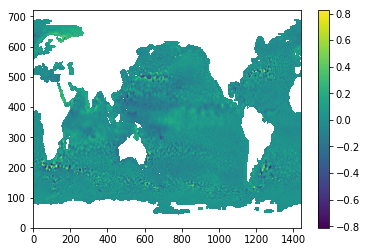

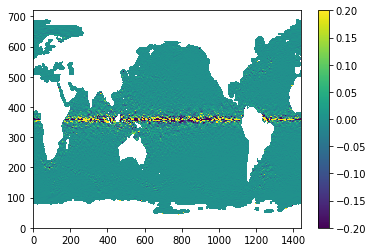

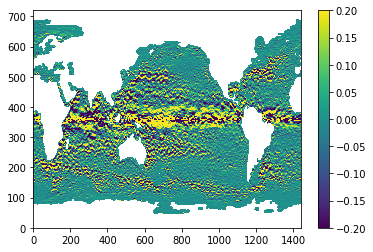

In [22]:
year=1993
monthsin=[1,4,7,10]
monthsend=[4,7,10,13]
inputfiles='/g/data/ua8/CMEMS_SeaLevel/v3-0/1993/'

ncfile=Dataset(inputfiles+'dt_global_allsat_phy_l4_19930101_20170110.nc')
ssha=squeeze(ncfile.variables['sla'][:])
mask=ma.getmask(ssha[:,:])
lon=ncfile.variables['longitude'][:]
lat=ncfile.variables['latitude'][:]

inputfiles='/g/data/ua8/CMEMS_SeaLevel/v3-0/1993/'

ncfile=Dataset(inputfiles+'dt_global_allsat_phy_l4_19930102_20170110.nc')
ssha2=squeeze(ncfile.variables['sla'][:])

u_g,v_g=geovelfield(ssha[:,:],lon,lat,mask)
u_g2,v_g2=geovelfield(ssha2[:,:],lon,lat,mask)

pcolormesh(ssha2)
colorbar()
show()
pcolormesh(u_g-u_g2,vmin=-0.2,vmax=0.2)
colorbar()
show()
pcolormesh(u_g,vmin=-0.2,vmax=0.2)
colorbar()
show()

In [11]:
print(shape(u_g)[0])
print(shape(v_g))

92
(92, 720, 1440)


In [ ]:
/home/156/jm5970/notebooks/traceddy/data.input/mean_ssha_u_1yrs.nc

In [ ]:
pcolormesh(mean(mean_u,axis=0))

In [ ]:
pcolormesh(mean(mean_v,axis=0))

threshold=3
    eddysup=exeddydt(eddytd,lat,lon,u_g,threshold,inside=eta[:,:,:],diagnostics=False)
    eddysun=exeddydt(eddytdn,lat,lon,u_g,threshold,inside=eta[:,:,:],diagnostics=False)
    
    threshold=3
    eddysvp=exeddydt(eddytd,lat,lon,v_g,threshold,inside=eta[:,:,:],diagnostics=False)
    eddysvn=exeddydt(eddytdn,lat,lon,v_g,threshold,inside=eta[:,:,:],diagnostics=False)
    
    eddyu=(eddysun+eddysup)
    eddyv=(eddysvn+eddysvp)
    print(shape(eddyu))
    
    for ii in range(0,shape(eta)[0]):
        eke[timecounter,:,:]=KE(eddyu[ii,:,:],eddyv[ii,:,:])
        bjke[timecounter,:,:]=KE(u_g[ii,:,:]-eddyu[ii,:,:],v_g[ii,:,:]-eddyv[ii,:,:])
        timecounter=timecounter+1
    print('End file:',ii)